## Quantum Energy Teleportation protocol for long distances

### Import packages

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as sampler
from qiskit.visualization import plot_histogram

## Article proposed circuits 

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [3]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def QET_QST_Z(k,h):
    qr1 = QuantumRegister(4)
    cr1 = ClassicalRegister(4,"alpha")
    qc1 = QuantumCircuit(qr1, cr1)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc1.ry(2*alpha,qr1[0])
    qc1.cx(qr1[0],qr1[1])
    
    # Alice's projective measurement
    qc1.h(qr1[0])

    #Bob's conditional operation
    phi=0.5*np.arcsin(sin(k,h))
    qc1.cry(-2*phi,qr1[0],qr1[1])
    
    qc1.x(qr1[0])
    qc1.cry(2*phi,qr1[0],qr1[1])
    qc1.x(qr1[0])

    qc1.measure([1],[1])
    
    # Teleport Quantum State after the measurement 
    #create Bell pair
    qc1.h(qr1[2])
    qc1.cx(qr1[2],qr1[3])
    
    #Bell measurement
    qc1.cx(qr1[1],qr1[2])
    qc1.h(qr1[1])
    
    #Equivalent to conditional operation
    qc1.cx(qr1[2],qr1[3])
    qc1.cz(qr1[1],qr1[3])

    qc1.measure([0,2,3], [0,2,3])
    return qc1

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [4]:
def sin(k,h):
    return (h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2)

def QET_QST_XX(k,h):
    qr1 = QuantumRegister(4)
    cr1 = ClassicalRegister(4,"alpha")
    qc1 = QuantumCircuit(qr1, cr1)
    
    #Prepare the ground state
    alpha=-np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc1.ry(2*alpha,qr1[0])
    qc1.cx(qr1[0],qr1[1])
    
    # Alice's projective measurement
    qc1.h(qr1[0])

    #Bob's conditional operation
    phi=0.5*np.arcsin(sin(k,h))
    qc1.cry(-2*phi,qr1[0],qr1[1])
    
    qc1.x(qr1[0])
    qc1.cry(2*phi,qr1[0],qr1[1])
    qc1.x(qr1[0])
    
    #Measurement of the interaction XX
    # Comment out qc.h(qr[1]) below for the measurement of Bob's Z term
    qc1.h(qr1[1])
    qc1.measure([1],[1])
    
    # Teleport Quantum State after the measurement 
    #create Bell pair
    qc1.h(qr1[2])
    qc1.cx(qr1[2],qr1[3])
    
    #Bell measurement
    qc1.cx(qr1[1],qr1[2])
    qc1.h(qr1[1])
    
    #Equivalent to conditional operation
    qc1.cx(qr1[2],qr1[3])
    qc1.cz(qr1[1],qr1[3])

    qc1.measure([0,2,3], [0,2,3])
    return qc1

### Show circuit

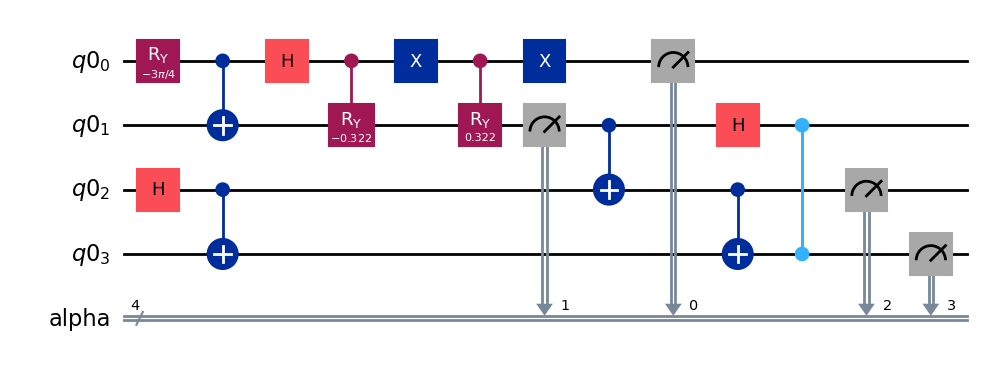

In [5]:
qc = QET_QST_Z(1,1)
qc.draw('mpl')

## Modified circuits

### Circuit for measurement of the local hamiltoninan $Z$ or $H$

In [6]:
def qt_Z(h,k):
   qc = QuantumCircuit(4)
    
   #Prepare the ground state
   theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
   qc.ry(2*theta,0)
   qc.cx(0,1)

   # Alice's projective measurement
   qc.barrier()
   qc.h(0)

   ## Teleport Activated State
   #create Bell pair
   qc.barrier()
   qc.h(2)
   qc.cx(2,3)

   # Prepare state teleportation
   qc.barrier()
   qc.cx(1,2)
   qc.h(1)

   # Condicional operation for state teleportation
   qc.barrier()
   qc.cx(2,3)
   qc.cz(1,3)

   # Energy extraction conditional operations on teleported state
   qc.barrier()
   phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

   qc.cry(-2*phi,0,3)

   qc.x(0)
   qc.cry(2*phi,0,3)
   qc.x(0)

   # Measurements
   qc.measure_all()

   return qc

### Circuit for measurement of the local hamiltoninan $XX$ or $V$

In [7]:
def qt_XX(h,k):
    qc = QuantumCircuit(4)
    
    #Prepare the ground state
    theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*theta,0)
    qc.cx(0,1)

    # Alice's projective measurement
    qc.barrier()
    qc.h(0)

    ## Teleport Activated State
    #create Bell pair
    qc.barrier()
    qc.h(2)
    qc.cx(2,3)

    # Prepare state teleportation
    qc.barrier()
    qc.cx(1,2)
    qc.h(1)

    # Condicional operation for state teleportation
    qc.barrier()
    qc.cx(2,3)
    qc.cz(1,3)

    # Energy extraction conditional operations on teleported state
    qc.barrier()
    phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

    qc.cry(-2*phi,0,3)

    qc.x(0)
    qc.cry(2*phi,0,3)
    qc.x(0)

    # Measurements
    qc.barrier()
    qc.h(3)
    qc.measure_all()

    return qc

### Show circuit

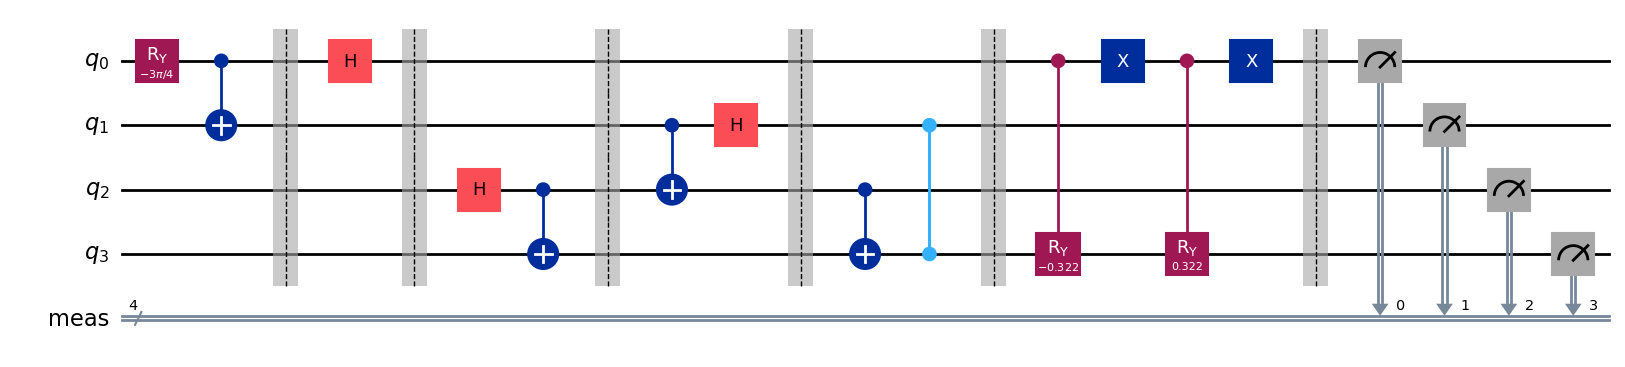

In [8]:
qc = qt_Z(1,1)
qc.draw('mpl')

### Circuit for measurement with Estimator

In [9]:
def qt_T(h,k):
    qc = QuantumCircuit(4)
    
    #Prepare the ground state
    theta = -np.arcsin((1/np.sqrt(2))*(np.sqrt(1+h/np.sqrt(h**2+k**2))))
    
    qc.ry(2*theta,0)
    qc.cx(0,1)

    # Alice's projective measurement
    qc.barrier()
    qc.h(0)

    ## Teleport Activated State
    #create Bell pair
    qc.barrier()
    qc.h(2)
    qc.cx(2,3)

    # Prepare state teleportation
    qc.barrier()
    qc.cx(1,2)
    qc.h(1)

    # Condicional operation for state teleportation
    qc.barrier()
    qc.cx(2,3)
    qc.cz(1,3)

    # Energy extraction conditional operations on teleported state
    qc.barrier()
    phi = 0.5*np.arcsin((h*k)/np.sqrt((h**2+2*k**2)**2+(h*k)**2))

    qc.cry(-2*phi,0,3)

    qc.x(0)
    qc.cry(2*phi,0,3)
    qc.x(0)

    # Measurements
    qc.barrier()
    qc.h(0)
    qc.measure_all()

    return qc

## Original circuit vs Modified circuit

In [65]:
# Initiate simulator
simulator = AerSimulator()

# Parameters
h = 1; k = 1.5;
n_shots = 100000

# Generate circuit
qc1 = QET_QST_Z(h, k)
qcA = transpile(qc1, simulator, optimization_level=3)

qc2 = QET_QST_XX(h, k)
qcB = transpile(qc2, simulator, optimization_level=3)

qc3= qt_Z(h, k)
qcC = transpile(qc3, simulator, optimization_level=3)

qc4= qt_XX(h, k)
qcD = transpile(qc4, simulator, optimization_level=3)

# Run job with Sampler
jobA= sampler().run([qcA], shots=n_shots)
jobB= sampler().run([qcB], shots=n_shots)
jobC= sampler().run([qcC], shots=n_shots)
jobD= sampler().run([qcD], shots=n_shots)


H_B = -0.045819803774770906 ± 0.002528588004400875


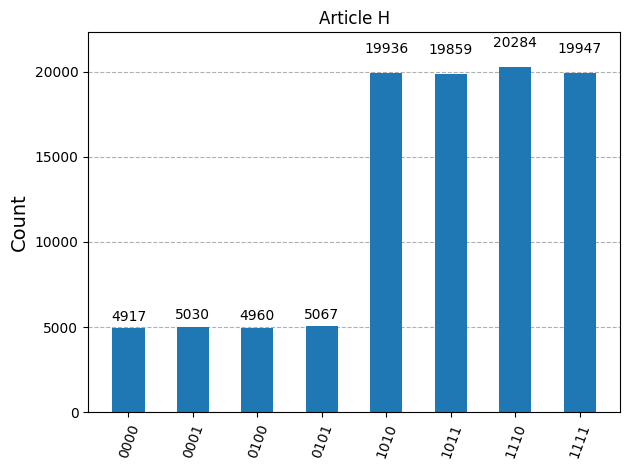

In [66]:
# Extract results
result = jobA.result()[0]
counts = result.data.alpha.get_counts()

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_B += h*(-1)**int(bit_string[3])*count/n_shots
        ene_A += h*(-1)**int(bit_string[0])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))

plot_histogram(counts, title="Article H")

H_B = 0.23758019622522894 ± 0.002999058028114827


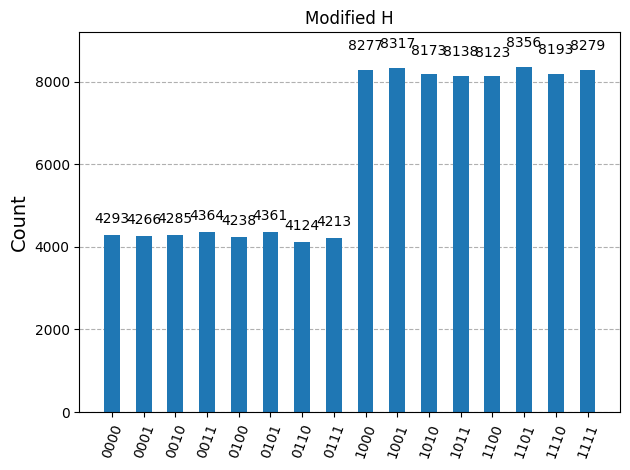

In [48]:
# Extract results
result = jobC.result()[0]
counts = result.data.meas.get_counts()

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_B += h*(-1)**int(bit_string[3])*count/n_shots
        ene_A += h*(-1)**int(bit_string[0])*count/n_shots

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))

plot_histogram(counts, title="Modified H")

V = 0.09873088301353122 ± 0.00570296181260229


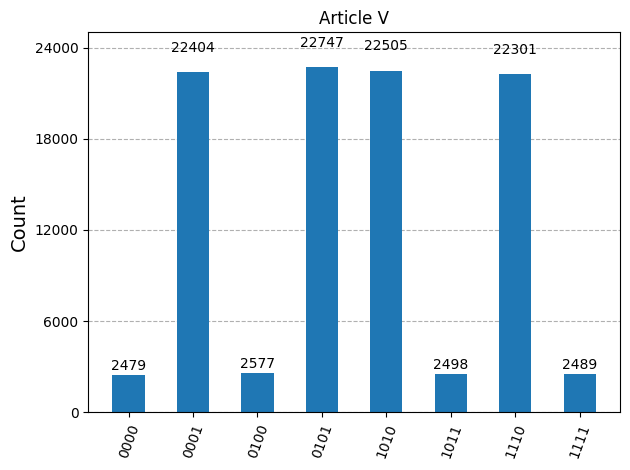

In [67]:
# Extract results
result = jobB.result()[0]
counts = result.data.alpha.get_counts()

ene_XX=(2*k**2)/(np.sqrt(h**2+k**2))

error_XX=[]

for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_XX += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_XX.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

print("V =",ene_XX,"±", np.std(error_XX)/np.sqrt(n_shots))

plot_histogram(counts, title="Article V")

V = -0.34526911698646867 ± 0.0030435709020819597


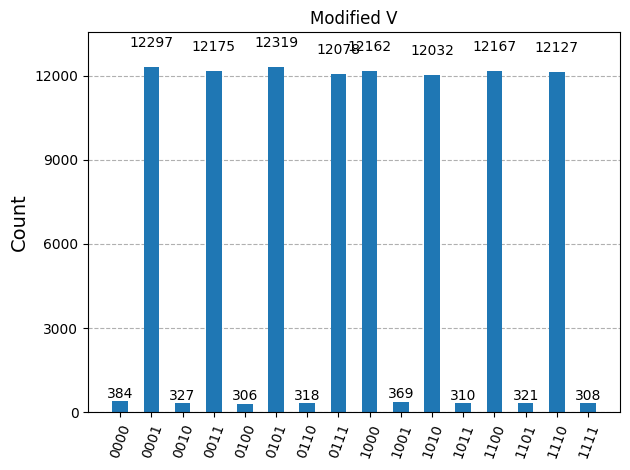

In [49]:
# Extract results
result = jobD.result()[0]
counts = result.data.meas.get_counts()

ene_XX=(2*k**2)/(np.sqrt(h**2+k**2))

error_XX=[]

for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_XX += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_XX.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

print("V =",ene_XX,"±", np.std(error_XX)/np.sqrt(n_shots))

plot_histogram(counts, title="Modified V")

### Import backend

In [15]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
backend = service.backend('ibm_brisbane')

### Execute modified model in with Sampler

In [ ]:
# Import IBM packages
from qiskit_ibm_runtime import Batch, SamplerV2 as sampler
from qiskit_ibm_runtime import SamplerOptions

variables = [(1,0.2),(1,0.5),(1,1),(1.5,1), (1, 1.5)]
#variables = [(1,1)]

with Batch(backend=backend):
    n_shots = 5000

    for variable in variables:
        h = variable[0]
        k = variable[1]

        # Generate circuits V and H
        circuit_V = qt_XX(h,k)
        qc_A = transpile(circuit_V, backend=backend, optimization_level=3)
        
        circuit_H = qt_Z(h,k)
        qc_B = transpile(circuit_H, backend=backend, optimization_level=3)

        # Run jobs for each circuit
        job_A = sampler().run([(qc_A)], shots=n_shots)
        print("Circuit V","ID =",job_A.job_id(), "h =",h, "k =",k)

        job_B = sampler().run([(qc_B)], shots=n_shots)
        print("Circuit H","ID =",job_B.job_id(), "h =",h, "k =",k) 

### Run model with Estimator

In [ ]:
# Import Estimator 
from qiskit_ibm_runtime import Batch, EstimatorV2 as estimator
from qiskit.transpiler import preset_passmanagers
from qiskit.quantum_info import SparsePauliOp 

# Parameters h and k
variables = [(1,0.2),(1,0.5),(1,1),(1.5,1),(1,1.5)]
#variables = [(1,1)]
transpiler = preset_passmanagers.generate_preset_pass_manager(optimization_level=3, backend=backend)

#  Run job in Batch mode
with Batch(backend=backend):

    for variable in variables:
        h = variable[0]
        k = variable[1]
        observables = [SparsePauliOp('ZIII', h), SparsePauliOp('XIIX', 2*k)]

        # Generate circuit
        circuit_T = qt_T(h,k)
        qc_T = transpiler.run(circuit_T)
        
        # Run jobs
        transpiled_observable = observables[0].apply_layout(qc_T.layout)
        job_C = estimator(options={"resilience_level": 2}).run([(qc_T, transpiled_observable)]) 
        print("Estimator H","ID =",job_C.job_id(), "h =",h, "k =",k) 

        transpiled_observable = observables[1].apply_layout(qc_T.layout)
        job_D = estimator(options={"resilience_level": 2}).run([(qc_T, transpiled_observable)]) 
        print("Estimator V","ID =",job_D.job_id(), "h =",h, "k =",k) 

Estimator H ID = d0dcqk6rxz8g008axspg h = 1 k = 0.2
Estimator V ID = d0dcqmpqnmvg0087t170 h = 1 k = 0.2
Estimator H ID = d0dcqny6rr3g0088021g h = 1 k = 0.5


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-06 22:56:28,674: The pending jobs limit has been reached. Waiting for job <RuntimeJobV2('d0dcqk6rxz8g008axspg', 'estimator')> to finish before submitting the next one.


Estimator V ID = d0dcqwfrxz8g008axsv0 h = 1 k = 0.5
Estimator H ID = d0dcqxzqnmvg0087t19g h = 1 k = 1
Estimator V ID = d0dcqz7qnmvg0087t1b0 h = 1 k = 1


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-06 22:57:04,829: The pending jobs limit has been reached. Waiting for job <RuntimeJobV2('d0dcqwfrxz8g008axsv0', 'estimator')> to finish before submitting the next one.


Estimator H ID = d0dcrbhqnmvg0087t1e0 h = 1.5 k = 1
Estimator V ID = d0dcrcsnhqag008q8et0 h = 1.5 k = 1


c:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:857: UserWarning: Your current pending jobs are estimated to consume 38.49549025816667 quantum seconds, but you only have 30 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)


Estimator H ID = d0dcre16rr3g008802a0 h = 1 k = 1.5


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-06 22:58:05,058: The pending jobs limit has been reached. Waiting for job <RuntimeJobV2('d0dcrbhqnmvg0087t1e0', 'estimator')> to finish before submitting the next one.
c:\Users\julio\AppData\Local\Programs\Python\Python313\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:857: UserWarning: Your current pending jobs are estimated to consume 37.48165012678991 quantum seconds, but you only have 18 quantum seconds left in your monthly quota; therefore, it is likely this job will be canceled
  warnings.warn(warning_message)


Estimator V ID = d0dcrqjnhqag008q8ew0 h = 1 k = 1.5


### Results

H_B = 0.44470678118654744 ± 0.01364658374832324
Estimated B = 0.26240227562774115 ± 0.015668315770563164


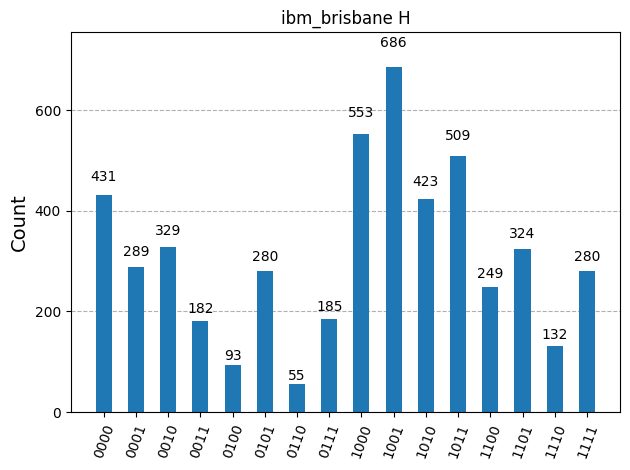

In [ ]:
# Extract results

# Sampler
jobS = service.job('d056hbxkzhn0008wdwk0') 
result = jobS.result()[0]
counts = result.data.meas.get_counts()

# Estimator
jobT = service.job('d0byw1gqnmvg0087fsj0')
result = jobT.result()[0]
exp_value = result.data.evs
value_error = result.data.stds

# parameters
h = 1; k = 1;
n_shots = 5000

# Energies
ene_A = (h**2)/(np.sqrt(h**2+k**2))
ene_B = (h**2)/(np.sqrt(h**2+k**2))
est_B = exp_value + ene_B

# Error arrays
error_A = []
error_B = []

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]

        ene_A += h*(-1)**int(bit_string[0])*count/n_shots
        ene_B += h*(-1)**int(bit_string[3])*count/n_shots 

        for i in range(count):
            error_A.append(h*(-1)**int(bit_string[0]))
            error_B.append(h*(-1)**int(bit_string[3]))

# Print results
print("H_B =",ene_B,"±",np.std(error_B)/np.sqrt(n_shots))
print("Estimated B =",est_B,"±",value_error)

plot_histogram(counts, title=f"{backend.name} H")

V = 0.15181356237309485 ± 0.02193784966672896
Estimated V = -0.29532263456872343 ± 0.014083987282820981


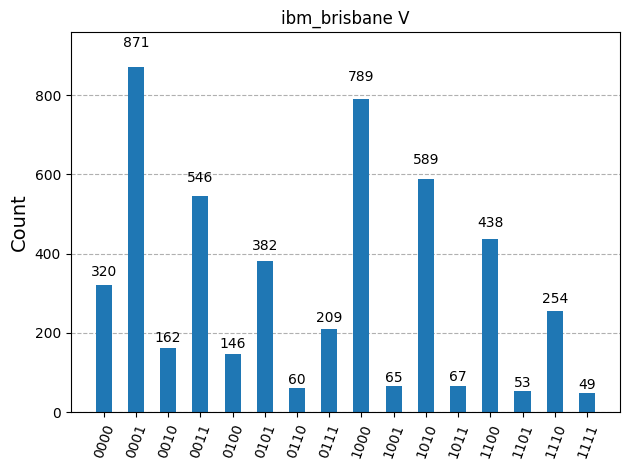

In [20]:
# Extract results

# Sampler
jobS = service.job('d056h956rr3g008e5mxg')
result = jobS.result()[0]
counts = result.data.meas.get_counts()

# Estimator
jobT = service.job('d0byhhy6rr3g0087np90')
result = jobT.result()[0]
exp_value = result.data.evs
value_error = result.data.stds

# parameters
h = 1; k = 1;
n_shots = 5000

# Energies
ene_V=(2*k**2)/(np.sqrt(h**2+k**2))
est_V = exp_value + ene_V

# Error arrays
error_V=[]

# Calculate energies and errors
for orig_bit_string, count in counts.items():
        bit_string = orig_bit_string[::-1]
    
        ene_V += 2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3])*count/n_shots

        for i in range(count):
            error_V.append(2*k*(-1)**int(bit_string[0])*(-1)**int(bit_string[3]))

# Print results
print("V =",ene_V,"±", np.std(error_V)/np.sqrt(n_shots))
print("Estimated V =",est_V,"±",value_error)

plot_histogram(counts, title=f"{backend.name} V")

### Show Transpiled circuit (see qubit mapping)

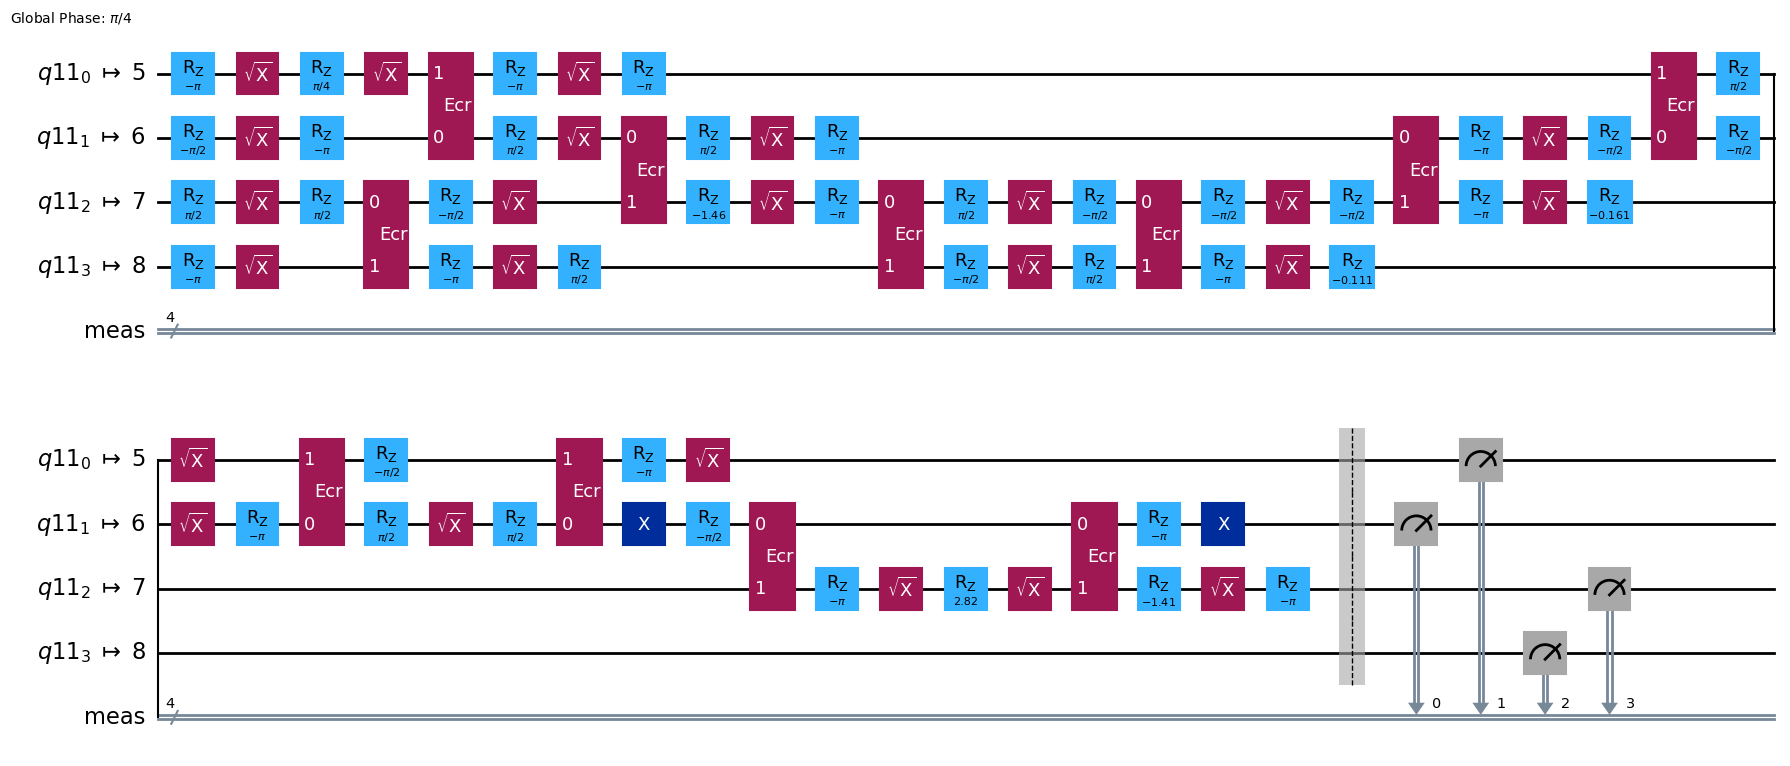

In [19]:
job = service.job('d056hbxkzhn0008wdwk0')
pubs = job.inputs['pubs'] 
circuits = [pub[0] for pub in pubs]
circuits[0].draw('mpl')